In [ ]:
from sklearn.datasets import fetch_openml 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline
import math

credit = fetch_openml('credit-g', cache=False)

X = credit.data
y = credit.target

print(X)
print(y)

features = [1, 2, 4, 5, 6, 8, 12, 15, 16]

heart = np.empty((X.shape[0], len(features)))
for i in range (len(features)):
  heart[:, i] = X[:, features[i]]
print(heart.shape)
X = heart
#X = credit.data
for i in range(y.shape[0]):
  if y[i] == 'good':
    y[i] = 1
  else:
    y[i] = 0
#1, 16, 4, 5
print('The shape of X is: ', X.shape)
print('The shape of y is: ', y.shape)


[[ 0.  6.  4. ...  1.  1.  0.]
 [ 1. 48.  2. ...  1.  0.  0.]
 [ 3. 12.  4. ...  2.  0.  0.]
 ...
 [ 3. 12.  2. ...  1.  0.  0.]
 [ 0. 45.  2. ...  1.  1.  0.]
 [ 1. 45.  4. ...  1.  0.  0.]]
['good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good'

In [ ]:
Ntotal = X.shape[0]
Ntest = X.shape[0]//10
Ntrain = Ntotal - Ntest

# generate a list of Ntest random indices, without repetitions, in the range of Ntotal
# these indices will be the indices of your test data. Use the function np.random.choice()
test_idx = np.random.choice(range(Ntotal), Ntest, replace=False)

# separate training and testing data
X_test = X[test_idx]
y_test = y[test_idx]
X_train = np.delete(X, test_idx, axis=0)
y_train = np.delete(y, test_idx)

print('The shape of X_test is: ', X_test.shape)
print('The shape of y_test is: ', y_test.shape)
print('The shape of X_train is: ', X_train.shape)
print('The shape of y_train is: ', y_train.shape)

The shape of X_test is:  (100, 9)
The shape of y_test is:  (100,)
The shape of X_train is:  (900, 9)
The shape of y_train is:  (900,)


In [ ]:
train_idx = np.random.choice(range(Ntrain), Ntrain, replace=False)

# now let's iterate over the training data to obtain the 
# 5 folds
Nfolds = 9
fold_size = Ntrain//Nfolds
X_folds = [] # this will be a list of 5 numpy arrays with datapoints
y_folds = [] # this will be a list of 5 numpy arrays with the corresponding labels
for i in range(Nfolds):
    
    X_fold = X_train[train_idx[i*fold_size:i*fold_size+fold_size]]
    y_fold = y_train[train_idx[i*fold_size:i*fold_size+fold_size]]

    X_folds.append(X_fold)
    y_folds.append(y_fold)

In [ ]:
Ks = [1, 11, 21, 51]


In [ ]:
def L1_norm(x, a):
  norm = []
  for i in x:
    dist = 0
    for j in range(x.shape[1]):
      dist += abs(i[j] - a[j])
    norm.append(dist)
  return norm

def L2_norm(x, a):
  norm = []
  for i in x:
    dist = 0
    for j in range(x.shape[1]):
      dist += (i[j]-a[j])**2
    norm.append(dist ** 1/2)
  return norm

In [ ]:
all_knn_fold_acc = []
for k in Ks: 
    all_fold_acc = []
    for ifold in range(Nfolds): 
        
        X_vl = X_folds[ifold]
        y_vl = y_folds[ifold]
        X_tr = [x for i, x in enumerate(X_folds) if i != ifold] 
        y_tr = [y for i, y in enumerate(y_folds) if i != ifold]

        X_tr = np.vstack(X_tr) 
        y_tr = np.hstack(y_tr) 
        
        KNN = []
        for x_vl in X_vl:
          classes = [0, 0]  
          all_distances = L2_norm(X_tr,x_vl)          
          sorted_distances = sorted([(d,i) for i, d in enumerate(all_distances)])
          K_close_examps = sorted_distances[:k]
          distances_sum = sum(np.array(K_close_examps)[:,0])
          K_close_categories = []
          for examp in K_close_examps:
            K_close_categories.append(y_tr[examp[1]])  
            classes [y_tr [examp  [1] ] ] += 1 - (examp[0] / distances_sum) 
          if classes[0] > classes[1]:
            answer = 0
          else:
            answer = 1
          KNN.append(answer)

        correct_count = 0
        for iknn, knn in enumerate(KNN):
            
            if knn == y_vl[iknn]:
                correct_count += 1
        all_fold_acc.append(correct_count/len(y_vl))
        
    all_knn_fold_acc.append(all_fold_acc)
    print(all_fold_acc)


[0.7, 0.74, 0.71, 0.67, 0.65, 0.71, 0.73, 0.69, 0.69]
[0.66, 0.71, 0.7, 0.69, 0.6, 0.72, 0.69, 0.66, 0.67]
[0.7, 0.76, 0.7, 0.69, 0.66, 0.71, 0.71, 0.68, 0.69]
[0.72, 0.76, 0.72, 0.69, 0.67, 0.72, 0.74, 0.68, 0.69]


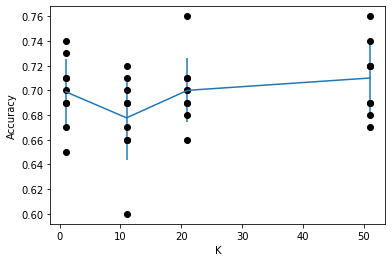

In [ ]:
# this cell generates a plot that will let you see what the best k
# for your model is

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(Ks,all_knn_fold_acc,'ok')
plt.errorbar(Ks,np.mean(all_knn_fold_acc,axis=1),np.std(all_knn_fold_acc,axis=1))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
KNN = []
for x_ts in X_test: # for all datapoints in the validation set
    all_distances = L2_norm(X_train,x_ts) # your code here. hint: use your L1 function            
    sorted_distances = sorted([(d,i) for i, d in enumerate(all_distances)])
    K_close_examps = sorted_distances[:51] # <- watch out for this k, because it has to be
                                          # the best from our validation plot
    distances_sum = sum(np.array(K_close_examps)[:,0])
    # here we are letting the categories
    # do the voting
    K_close_categories = []
    classes = [0, 0]
    for examp in K_close_examps:
      K_close_categories.append(y_train[examp[1]])  
      classes [y_train[examp  [1] ] ] += 1 - examp[0] / distances_sum
    if classes[0] > classes[1]:
      answer = 0
    else:
      answer = 1
    KNN.append(answer)
    correct_count = 0
    for iknn, knn in enumerate(KNN):
        
        if knn == y_test[iknn]:
            correct_count += 1
print('The test accuracy is: ', correct_count/len(y_test))


The test accuracy is:  0.69
